## importing and cleaning

In [1]:
#reading the dataset
import pandas as pd
data=pd.read_csv('spam_ham_final.csv',engine='python',error_bad_lines=False,encoding = "ISO-8859-1")

/var/folders/yx/fh5_d0rs6gd20cz4nhtgmzy40000gn/T/ipykernel_15450/1720458204.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('spam_ham_final.csv',engine='python',error_bad_lines=False,encoding = "ISO-8859-1")


In [2]:
data.head()

,Spam_or_ham,Message
0,Ham,50% Daily Data quota used as on 28-Jul-23 18:3...
1,Ham,ICICI Bank Acct XX154 debited for Rs 19500.00 ...
2,Spam,"manikantam, Price drop on DNMX, Teamspirit - M..."
3,Ham,Hey sharath! Your AJIO order FL0313769681/ 372...
4,Ham,Hey sharath! It's time to celebrate. Your AJIO...


In [3]:
data.shape

(1005, 2)

In [4]:
data.isnull().sum()

Spam_or_ham    0
Message        0
dtype: int64

In [5]:
data.head()

,Spam_or_ham,Message
0,Ham,50% Daily Data quota used as on 28-Jul-23 18:3...
1,Ham,ICICI Bank Acct XX154 debited for Rs 19500.00 ...
2,Spam,"manikantam, Price drop on DNMX, Teamspirit - M..."
3,Ham,Hey sharath! Your AJIO order FL0313769681/ 372...
4,Ham,Hey sharath! It's time to celebrate. Your AJIO...


In [6]:
#data cleaning (stopwords and stem or lem)
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('all')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manikantamsadam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manikantamsadam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manikantamsadam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/manikantamsadam/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/manikantamsadam/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/manikantamsadam/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is 

True

In [7]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
def preprocess(data):
  stemmer=PorterStemmer()
  lemmatizer=WordNetLemmatizer()
  corpus=[]
  for i in range(len(data['Message'])):
    review=re.sub('[^a-zA-Z0-9%@!./?&-]',' ',data['Message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(words) for words in review if words not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
  return corpus
corpus=preprocess(data)

In [8]:
corpus[0]

'50% daily data quota used 28-jul-23 18 32. jio number 9866445361 daily data quota per plan 2.50 gb know manage account myjio app click http //youtu.be/nkg fluuxd8 dial 1991 know current balance validity plan detail exciting recharge plans.'

# embedding representation

In [9]:
# import tensorflow.compat.v2 as tf
# print(tf.__version__)
# !pip list | grep tensorflow
# !pip cache purge
# !conda update tensorflow
# !conda install -c conda-forge tensorflow


In [10]:
#one_hot representation
import tensorflow as tf

from keras.preprocessing.text import one_hot
voc_size=5000
onehot_repr=[one_hot(words,voc_size) for words in corpus]
# onehot_repr = [hash(word) % voc_size for word in corpus] #another way of doing one hot coding

In [11]:
onehot_repr[0]

[752,
 4566,
 1952,
 3839,
 1605,
 4701,
 4362,
 3825,
 3037,
 1252,
 2988,
 1294,
 4799,
 4566,
 1952,
 3839,
 2384,
 1144,
 3225,
 752,
 1373,
 4524,
 4268,
 3496,
 2261,
 4713,
 4093,
 1632,
 3434,
 2581,
 2518,
 2363,
 1606,
 1758,
 4524,
 2741,
 2758,
 3952,
 1144,
 2250,
 2659,
 109,
 4263]

In [12]:
#word embedding representation
from tensorflow.keras.layers import Embedding,LSTM,Bidirectional,Dense,Dropout,Attention
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np


In [13]:
#checking the max sentence length
max([len(sent) for sent in onehot_repr])

78

In [14]:
sent_length=16
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)

In [15]:
embedded_docs

array([[1632, 3434, 2581, ..., 2659,  109, 4263],
       [ 783, 3985, 3825, ..., 4249, 1024, 4921],
       [4900, 1646,  833, ...,  899, 3764, 1444],
       ...,
       [ 336, 2021, 1008, ...,    0,    0,    0],
       [ 336,  448, 1008, ..., 4036,    0,    0],
       [2568,  336,  525, ..., 2433, 2526,  525]], dtype=int32)

In [16]:
#giving feature to each element
feat_dim=30

# Model 1: Basic LSTM
model1=Sequential()
model1.add(Embedding(voc_size,feat_dim,input_length=sent_length))
model1.add(LSTM(100))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-08-20 16:28:01.197639: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-08-20 16:28:01.197668: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-20 16:28:01.197674: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-20 16:28:01.197771: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-20 16:28:01.198019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
# Model 2: Bidirectional LSTM

model2 = Sequential()
model2.add(Embedding(voc_size, feat_dim, input_length=sent_length))
model2.add(Bidirectional(LSTM(100)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Model 3: Stacked LSTM

model3 = Sequential()
model3.add(Embedding(voc_size, feat_dim, input_length=sent_length))
model3.add(LSTM(100, return_sequences=True))
model3.add(LSTM(100))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Model 4: LSTM with Dropout

model4 = Sequential()
model4.add(Embedding(voc_size, feat_dim, input_length=sent_length))
model4.add(LSTM(100))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Model 5: LSTM with Convolutional Layers
from keras.layers import Conv1D, MaxPooling1D

model5 = Sequential()
model5.add(Embedding(voc_size, feat_dim, input_length=sent_length))
model5.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(LSTM(100))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Model 6: Hierarchical LSTM
from keras.layers import TimeDistributed

feat_dim = 30
model6 = Sequential()
model6.add(Embedding(voc_size, feat_dim, input_length=sent_length))
model6.add(LSTM(100, return_sequences=True))
model6.add(TimeDistributed(Dense(50)))
model6.add(LSTM(100))
model6.add(Dense(1, activation='sigmoid'))
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [22]:
# Model 7:  LSTM with GRU
from keras.layers import GRU

feat_dim = 30
model7 = Sequential()
model7.add(Embedding(voc_size, feat_dim, input_length=sent_length))
model7.add(LSTM(100, return_sequences=True))
model7.add(GRU(100))
model7.add(Dense(1, activation='sigmoid'))
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
# Model 8: LSTM with Layer Normalization
from keras.layers import LayerNormalization

feat_dim = 30
model8 = Sequential()
model8.add(Embedding(voc_size, feat_dim, input_length=sent_length))
model8.add(LSTM(100, return_sequences=True))
model8.add(LayerNormalization())
model8.add(Dense(1, activation='sigmoid'))
model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 30)            150000    
                                                                 
 lstm (LSTM)                 (None, 100)               52400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 202501 (791.02 KB)
Trainable params: 202501 (791.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16, 30)            150000    
                                                                 
 bidirectional (Bidirection  (None, 200)               104800    
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 255001 (996.10 KB)
Trainable params: 255001 (996.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 16, 30)            150000    
                                                                 
 lstm_2 (LSTM)               (None, 16, 100)           52400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 282901 (1.08 MB)
Trainable params: 282901 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 16, 30)            150000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               52400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 202501 (791.02 KB)
Trainable params: 202501 (791.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 16, 30)            150000    
                                                                 
 conv1d (Conv1D)             (None, 14, 32)            2912      
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 32)             0         
 D)                                                              
                                                                 
 lstm_5 (LSTM)               (None, 100)               53200     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 206213 (805.52 KB)
Trainable params: 206213 (805.52 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [29]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 16, 30)            150000    
                                                                 
 lstm_6 (LSTM)               (None, 16, 100)           52400     
                                                                 
 time_distributed (TimeDist  (None, 16, 50)            5050      
 ributed)                                                        
                                                                 
 lstm_7 (LSTM)               (None, 100)               60400     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 267951 (1.02 MB)
Trainable params: 267951 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [30]:
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 16, 30)            150000    
                                                                 
 lstm_8 (LSTM)               (None, 16, 100)           52400     
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 263101 (1.00 MB)
Trainable params: 263101 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 16, 30)            150000    
                                                                 
 lstm_9 (LSTM)               (None, 16, 100)           52400     
                                                                 
 layer_normalization (Layer  (None, 16, 100)           200       
 Normalization)                                                  
                                                                 
 dense_8 (Dense)             (None, 16, 1)             101       
                                                                 
Total params: 202701 (791.80 KB)
Trainable params: 202701 (791.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
len(embedded_docs)

1005

In [33]:
y=pd.get_dummies(data['Spam_or_ham'])
y

,Ham,Spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
1000,1,0
1001,1,0
1002,1,0
1003,1,0


In [34]:
y=y['Spam']

In [35]:
#dependent and independent
x=np.array(embedded_docs)
y=np.array(y)

In [36]:
x.shape,y.shape

((1005, 16), (1005,))

In [37]:
#splitting
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [38]:
xtrain.shape,ytrain.shape

((753, 16), (753,))

In [39]:
type(xtrain)

numpy.ndarray

In [40]:
model1.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=32,batch_size=84)
model2.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=32,batch_size=84)
model3.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=32,batch_size=84)
model4.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=32,batch_size=84)
model5.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=32,batch_size=84)


Epoch 1/32


2023-08-20 16:28:03.588706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:03.800268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/9 [==>...........................] - ETA: 9s - loss: 0.6921 - accuracy: 0.7024

2023-08-20 16:28:04.042626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 2s 88ms/step - loss: 0.6836 - accuracy: 0.6056 - val_loss: 0.6503 - val_accuracy: 0.6627
Epoch 2/32


2023-08-20 16:28:04.757398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:04.824173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 40ms/step - loss: 0.6215 - accuracy: 0.6003 - val_loss: 0.5120 - val_accuracy: 0.6786
Epoch 3/32
9/9 [==============================] - 0s 31ms/step - loss: 0.3958 - accuracy: 0.7769 - val_loss: 0.3050 - val_accuracy: 0.8730
Epoch 4/32
9/9 [==============================] - 0s 33ms/step - loss: 0.2006 - accuracy: 0.9283 - val_loss: 0.3519 - val_accuracy: 0.8690
Epoch 5/32
9/9 [==============================] - 0s 35ms/step - loss: 0.1272 - accuracy: 0.9602 - val_loss: 0.5268 - val_accuracy: 0.8611
Epoch 6/32
9/9 [==============================] - 0s 29ms/step - loss: 0.0914 - accuracy: 0.9695 - val_loss: 0.4696 - val_accuracy: 0.8611
Epoch 7/32
9/9 [==============================] - 0s 33ms/step - loss: 0.0645 - accuracy: 0.9827 - val_loss: 0.4398 - val_accuracy: 0.8651
Epoch 8/32
9/9 [==============================] - 0s 37ms/step - loss: 0.0484 - accuracy: 0.9841 - val_loss: 0.4900 - val_accuracy: 0.8571
Epoch 9/32
9/9 [======================

2023-08-20 16:28:13.083521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:13.331898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:13.350464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:13.519513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/9 [==>...........................] - ETA: 10s - loss: 0.6938 - accuracy: 0.4881

2023-08-20 16:28:13.545701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.5870

2023-08-20 16:28:14.405733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:14.496009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:14.508210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 2s 118ms/step - loss: 0.6801 - accuracy: 0.5870 - val_loss: 0.6437 - val_accuracy: 0.6627
Epoch 2/32
9/9 [==============================] - 0s 45ms/step - loss: 0.6271 - accuracy: 0.6029 - val_loss: 0.5350 - val_accuracy: 0.6706
Epoch 3/32
9/9 [==============================] - 0s 39ms/step - loss: 0.4036 - accuracy: 0.7782 - val_loss: 0.3167 - val_accuracy: 0.8651
Epoch 4/32
9/9 [==============================] - 0s 39ms/step - loss: 0.1845 - accuracy: 0.9336 - val_loss: 0.3249 - val_accuracy: 0.8849
Epoch 5/32
9/9 [==============================] - 0s 37ms/step - loss: 0.1329 - accuracy: 0.9602 - val_loss: 0.3436 - val_accuracy: 0.8810
Epoch 6/32
9/9 [==============================] - 0s 38ms/step - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.3363 - val_accuracy: 0.8810
Epoch 7/32
9/9 [==============================] - 0s 34ms/step - loss: 0.0598 - accuracy: 0.9841 - val_loss: 0.5001 - val_accuracy: 0.8690
Epoch 8/32
9/9 [=====================

2023-08-20 16:28:24.556386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:24.818998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:24.888699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:25.047518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:25.175954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.6760 - accuracy: 0.5817

2023-08-20 16:28:26.017496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:26.110068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:26.172356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 2s 124ms/step - loss: 0.6760 - accuracy: 0.5817 - val_loss: 0.6161 - val_accuracy: 0.6627
Epoch 2/32
9/9 [==============================] - 0s 41ms/step - loss: 0.5682 - accuracy: 0.6388 - val_loss: 0.3902 - val_accuracy: 0.8373
Epoch 3/32
9/9 [==============================] - 0s 36ms/step - loss: 0.2548 - accuracy: 0.9216 - val_loss: 0.4687 - val_accuracy: 0.8452
Epoch 4/32
9/9 [==============================] - 0s 35ms/step - loss: 0.1449 - accuracy: 0.9535 - val_loss: 0.3693 - val_accuracy: 0.8571
Epoch 5/32
9/9 [==============================] - 0s 34ms/step - loss: 0.0913 - accuracy: 0.9708 - val_loss: 0.3987 - val_accuracy: 0.8690
Epoch 6/32
9/9 [==============================] - 0s 32ms/step - loss: 0.0707 - accuracy: 0.9801 - val_loss: 0.4786 - val_accuracy: 0.8849
Epoch 7/32
9/9 [==============================] - 0s 34ms/step - loss: 0.0545 - accuracy: 0.9774 - val_loss: 0.4894 - val_accuracy: 0.8690
Epoch 8/32
9/9 [=====================

2023-08-20 16:28:34.816798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:34.982758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/9 [==>...........................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5714

2023-08-20 16:28:35.186181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.6029

2023-08-20 16:28:36.067201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:36.131231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 2s 118ms/step - loss: 0.6822 - accuracy: 0.6029 - val_loss: 0.6566 - val_accuracy: 0.6706
Epoch 2/32
9/9 [==============================] - 0s 41ms/step - loss: 0.6261 - accuracy: 0.6109 - val_loss: 0.5318 - val_accuracy: 0.6786
Epoch 3/32
9/9 [==============================] - 0s 41ms/step - loss: 0.4290 - accuracy: 0.7424 - val_loss: 0.3154 - val_accuracy: 0.8770
Epoch 4/32
9/9 [==============================] - 0s 34ms/step - loss: 0.2089 - accuracy: 0.9256 - val_loss: 0.4026 - val_accuracy: 0.8294
Epoch 5/32
9/9 [==============================] - 0s 33ms/step - loss: 0.1294 - accuracy: 0.9575 - val_loss: 0.6501 - val_accuracy: 0.8651
Epoch 6/32
9/9 [==============================] - 0s 37ms/step - loss: 0.0957 - accuracy: 0.9721 - val_loss: 0.6594 - val_accuracy: 0.8651
Epoch 7/32
9/9 [==============================] - 0s 37ms/step - loss: 0.0871 - accuracy: 0.9761 - val_loss: 0.6476 - val_accuracy: 0.8730
Epoch 8/32
9/9 [=====================

2023-08-20 16:28:44.378803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:44.604571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:44.819600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.6826 - accuracy: 0.6042

2023-08-20 16:28:45.837212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:28:45.914327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 2s 124ms/step - loss: 0.6826 - accuracy: 0.6042 - val_loss: 0.6512 - val_accuracy: 0.6627
Epoch 2/32
9/9 [==============================] - 0s 38ms/step - loss: 0.6469 - accuracy: 0.6003 - val_loss: 0.5902 - val_accuracy: 0.6627
Epoch 3/32
9/9 [==============================] - 0s 38ms/step - loss: 0.5758 - accuracy: 0.6003 - val_loss: 0.4962 - val_accuracy: 0.6706
Epoch 4/32
9/9 [==============================] - 0s 32ms/step - loss: 0.4069 - accuracy: 0.7291 - val_loss: 0.3366 - val_accuracy: 0.8492
Epoch 5/32
9/9 [==============================] - 0s 42ms/step - loss: 0.2048 - accuracy: 0.9456 - val_loss: 0.2709 - val_accuracy: 0.8770
Epoch 6/32
9/9 [==============================] - 0s 39ms/step - loss: 0.1253 - accuracy: 0.9628 - val_loss: 0.4255 - val_accuracy: 0.8849
Epoch 7/32
9/9 [==============================] - 0s 31ms/step - loss: 0.0847 - accuracy: 0.9734 - val_loss: 0.6411 - val_accuracy: 0.8770
Epoch 8/32
9/9 [=====================

In [82]:
ypred1=model1.predict(xtest)
ypred2=model2.predict(xtest)
ypred3=model3.predict(xtest)
ypred4=model4.predict(xtest)
ypred5=model5.predict(xtest)
ypred6=model6.predict(xtest)
ypred7=model7.predict(xtest)
ypred8=model8.predict(xtest)

8/8 [==============================] - 0s 12ms/step


In [83]:
ypred1
ypred2
ypred3
ypred4
ypred5
ypred6
ypred7
ypred8

array([[[0.53292865],
        [0.5291282 ],
        [0.5316249 ],
        ...,
        [0.5831013 ],
        [0.6062946 ],
        [0.6217816 ]],

       [[0.5190584 ],
        [0.47520673],
        [0.52795476],
        ...,
        [0.54531205],
        [0.5719537 ],
        [0.6055558 ]],

       [[0.5012987 ],
        [0.50872463],
        [0.4636527 ],
        ...,
        [0.5174446 ],
        [0.50042146],
        [0.5554095 ]],

       ...,

       [[0.5190584 ],
        [0.47574392],
        [0.49659038],
        ...,
        [0.4992684 ],
        [0.5714533 ],
        [0.5606494 ]],

       [[0.5568018 ],
        [0.52532023],
        [0.59238166],
        ...,
        [0.51466   ],
        [0.5392869 ],
        [0.5290861 ]],

       [[0.54628843],
        [0.53180534],
        [0.5272924 ],
        ...,
        [0.4852928 ],
        [0.5235212 ],
        [0.55774343]]], dtype=float32)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [85]:
ypred_cond1=np.where(ypred1>0.5,1,0)
ypred_cond2=np.where(ypred2>0.5,1,0)
ypred_cond3=np.where(ypred3>0.5,1,0)
ypred_cond4=np.where(ypred4>0.5,1,0)
ypred_cond5=np.where(ypred5>0.5,1,0)
ypred_cond6=np.where(ypred6>0.5,1,0)
ypred_cond7=np.where(ypred7>0.5,1,0)
ypred_cond8=np.where(ypred8>0.5,1,0)

In [86]:
print(confusion_matrix(ytest,ypred_cond1))
print(confusion_matrix(ytest,ypred_cond2))
print(confusion_matrix(ytest,ypred_cond3))
print(confusion_matrix(ytest,ypred_cond4))
print(confusion_matrix(ytest,ypred_cond5))
print(confusion_matrix(ytest,ypred_cond6))
print(confusion_matrix(ytest,ypred_cond7))
# print(confusion_matrix(ytest,ypred_cond8))

[[ 19  66]
 [  6 161]]
[[ 51  34]
 [  7 160]]
[[  4  81]
 [  0 167]]
[[ 29  56]
 [  2 165]]
[[ 33  52]
 [  3 164]]
[[29 56]
 [99 68]]
[[44 41]
 [68 99]]


In [87]:
print("model1",accuracy_score(ytest,ypred_cond1))
print("model2",accuracy_score(ytest,ypred_cond2))
print("model3",accuracy_score(ytest,ypred_cond3))
print("model4",accuracy_score(ytest,ypred_cond4))
print("model5",accuracy_score(ytest,ypred_cond5))
print("model6",accuracy_score(ytest,ypred_cond6))
print("model7",accuracy_score(ytest,ypred_cond7))
# print("model8",accuracy_score(ytest,ypred_cond8))
# model1 0.873015873015873
# model2 0.873015873015873
# model3 0.8888888888888888

model1 0.7142857142857143
model2 0.8373015873015873
model3 0.6785714285714286
model4 0.7698412698412699
model5 0.7817460317460317
model6 0.38492063492063494
model7 0.5674603174603174


## Preprocessing for Test data

In [71]:
def preprocess_test(data):
  data=str(data)
  stemmer=PorterStemmer()
  lemmatizer=WordNetLemmatizer()
  corpus=[]
  review=re.sub('[^a-zA-Z0-9%@!]',' ',data)
  review=review.lower()
  review=review.split()
  review=[lemmatizer.lemmatize(words) for words in review if words not in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
  return corpus
def embedding_test(test_data):
  test_data=preprocess_test(test_data)
  voc_size=5000
  sent_length=16
  test_data=[one_hot(str(test_data),voc_size)]
  embedded_doc_test=pad_sequences(test_data,padding='pre',maxlen=sent_length)
  return embedded_doc_test
def predict(test_data,model):
    test_data=embedding_test(test_data)
    res=model.predict(test_data)
    result=np.where(res>0.5,1,0)
    if(int(result)):
        print(str(model),"spam")
        return 1
    else:
        print(str(model),"not spam")
        return 0

In [48]:
test1="Do not take help from strangers at the ATM. Always cover the ATM keypad with your hand while keying in the PIN. -RBI"

predict(test1,model1)
predict(test1,model2)
predict(test1,model3)
predict(test1,model4)
predict(test1,model5)
predict(test1,model6)
predict(test1,model7)

1/1 [==============================] - 0s 71ms/step
<keras.src.engine.sequential.Sequential object at 0x17eb6d960> not spam
1/1 [==============================] - 0s 57ms/step
<keras.src.engine.sequential.Sequential object at 0x28311eec0> spam
1/1 [==============================] - 0s 59ms/step
<keras.src.engine.sequential.Sequential object at 0x28311e2f0> not spam
1/1 [==============================] - 0s 45ms/step
<keras.src.engine.sequential.Sequential object at 0x28427b9d0> not spam
1/1 [==============================] - 0s 56ms/step
<keras.src.engine.sequential.Sequential object at 0x284ab7b50> not spam
1/1 [==============================] - 0s 62ms/step
<keras.src.engine.sequential.Sequential object at 0x284a43f40> spam
1/1 [==============================] - 0s 50ms/step
<keras.src.engine.sequential.Sequential object at 0x2854f8730> not spam


In [49]:
test2="We hope you are happy with the products & services of Jio. Please spare a moment to share your experience with us. Click https://t.jio/zibhL to share."
predict(test2,model1)
predict(test2,model2)
predict(test2,model3)
predict(test2,model4)
predict(test2,model5)
predict(test2,model6)
predict(test2,model7)

1/1 [==============================] - 0s 17ms/step
<keras.src.engine.sequential.Sequential object at 0x17eb6d960> spam
1/1 [==============================] - 0s 27ms/step
<keras.src.engine.sequential.Sequential object at 0x28311eec0> spam
1/1 [==============================] - 0s 14ms/step
<keras.src.engine.sequential.Sequential object at 0x28311e2f0> spam
1/1 [==============================] - 0s 14ms/step
<keras.src.engine.sequential.Sequential object at 0x28427b9d0> spam
1/1 [==============================] - 0s 19ms/step
<keras.src.engine.sequential.Sequential object at 0x284ab7b50> spam
1/1 [==============================] - 0s 15ms/step
<keras.src.engine.sequential.Sequential object at 0x284a43f40> spam
1/1 [==============================] - 0s 23ms/step
<keras.src.engine.sequential.Sequential object at 0x2854f8730> not spam


In [50]:
test3="hi there here i am to tell you we are offering the oppertunity to get into our organisation further contact click bit.ly/B6yuZw"
predict(test3,model1)

1/1 [==============================] - 0s 19ms/step
<keras.src.engine.sequential.Sequential object at 0x17eb6d960> not spam


## Retraining the model

In [51]:
retrain_X="hi there here i am to tell you we are offering the oppertunity to get into our organisation further contact click bit.ly/B6yuZw"
retrain_X=embedding_test(retrain_X)
retrain_Y=np.array(1).reshape(-1,1)


In [69]:
model1.fit(retrain_X,retrain_Y,epochs=32,batch_size=84)
model2.fit(retrain_X,retrain_Y,epochs=32,batch_size=84)
model3.fit(retrain_X,retrain_Y,epochs=32,batch_size=84)
model4.fit(retrain_X,retrain_Y,epochs=32,batch_size=84)
model5.fit(retrain_X,retrain_Y,epochs=32,batch_size=84)

Epoch 1/32
1/1 [==============================] - 0s 45ms/step - loss: 1.4186e-05 - accuracy: 1.0000
Epoch 2/32
1/1 [==============================] - 0s 43ms/step - loss: 1.2875e-05 - accuracy: 1.0000
Epoch 3/32
1/1 [==============================] - 0s 22ms/step - loss: 1.1802e-05 - accuracy: 1.0000
Epoch 4/32
1/1 [==============================] - 0s 36ms/step - loss: 1.0967e-05 - accuracy: 1.0000
Epoch 5/32
1/1 [==============================] - 0s 31ms/step - loss: 1.0252e-05 - accuracy: 1.0000
Epoch 6/32
1/1 [==============================] - 0s 19ms/step - loss: 9.6559e-06 - accuracy: 1.0000
Epoch 7/32
1/1 [==============================] - 0s 20ms/step - loss: 9.0599e-06 - accuracy: 1.0000
Epoch 8/32
1/1 [==============================] - 0s 48ms/step - loss: 8.7022e-06 - accuracy: 1.0000
Epoch 9/32
1/1 [==============================] - 0s 32ms/step - loss: 8.2254e-06 - accuracy: 1.0000
Epoch 10/32
1/1 [==============================] - 0s 20ms/step - loss: 7.9870e-06 - accura

2023-08-20 16:31:28.522719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:28.856198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:28.910163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:29.291837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:29.317239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.0391 - accuracy: 1.0000
Epoch 2/32
1/1 [==============================] - 0s 112ms/step - loss: 2.8737e-04 - accuracy: 1.0000
Epoch 3/32
1/1 [==============================] - 0s 118ms/step - loss: 7.0333e-06 - accuracy: 1.0000
Epoch 4/32
1/1 [==============================] - 0s 77ms/step - loss: 1.6689e-06 - accuracy: 1.0000
Epoch 5/32
1/1 [==============================] - 0s 51ms/step - loss: 8.3446e-07 - accuracy: 1.0000
Epoch 6/32
1/1 [==============================] - 0s 38ms/step - loss: 4.7684e-07 - accuracy: 1.0000
Epoch 7/32
1/1 [==============================] - 0s 51ms/step - loss: 3.5763e-07 - accuracy: 1.0000
Epoch 8/32
1/1 [==============================] - 0s 103ms/step - loss: 2.3842e-07 - accuracy: 1.0000
Epoch 9/32
1/1 [==============================] - 0s 48ms/step - loss: 2.3842e-07 - accuracy: 1.0000
Epoch 10/32
1/1 [==============================] - 0s 90ms/step - loss: 1.1921e-07 - accuracy: 1.0000
Epo

2023-08-20 16:31:31.472687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:31.742709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:31.832345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:32.092478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:32.260874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.9456 - accuracy: 0.0000e+00
Epoch 2/32
1/1 [==============================] - 0s 119ms/step - loss: 0.1206 - accuracy: 1.0000
Epoch 3/32
1/1 [==============================] - 0s 102ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 4/32
1/1 [==============================] - 0s 71ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 5/32
1/1 [==============================] - 0s 87ms/step - loss: 5.5727e-04 - accuracy: 1.0000
Epoch 6/32
1/1 [==============================] - 0s 104ms/step - loss: 1.7677e-04 - accuracy: 1.0000
Epoch 7/32
1/1 [==============================] - 0s 27ms/step - loss: 7.9152e-05 - accuracy: 1.0000
Epoch 8/32
1/1 [==============================] - 0s 66ms/step - loss: 4.5418e-05 - accuracy: 1.0000
Epoch 9/32
1/1 [==============================] - 0s 68ms/step - loss: 3.1232e-05 - accuracy: 1.0000
Epoch 10/32
1/1 [==============================] - 0s 28ms/step - loss: 2.4318e-05 - accuracy: 1.0000
Epoch 11/32

2023-08-20 16:31:34.311285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:34.509583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:35.023829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 4.2168 - accuracy: 0.0000e+00
Epoch 2/32
1/1 [==============================] - 0s 70ms/step - loss: 0.3913 - accuracy: 1.0000
Epoch 3/32
1/1 [==============================] - 0s 93ms/step - loss: 0.0701 - accuracy: 1.0000
Epoch 4/32
1/1 [==============================] - 0s 111ms/step - loss: 0.0248 - accuracy: 1.0000
Epoch 5/32
1/1 [==============================] - 0s 49ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 6/32
1/1 [==============================] - 0s 48ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 7/32
1/1 [==============================] - 0s 86ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 8/32
1/1 [==============================] - 0s 28ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 9/32
1/1 [==============================] - 0s 48ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 10/32
1/1 [==============================] - 0s 37ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 11/32
1/1 [====================

2023-08-20 16:31:36.753600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:36.998395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-20 16:31:37.255286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.2789 - accuracy: 1.0000
Epoch 2/32
1/1 [==============================] - 0s 99ms/step - loss: 0.0404 - accuracy: 1.0000
Epoch 3/32
1/1 [==============================] - 0s 84ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 4/32
1/1 [==============================] - 0s 84ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 5/32
1/1 [==============================] - 0s 91ms/step - loss: 3.5971e-04 - accuracy: 1.0000
Epoch 6/32
1/1 [==============================] - 0s 80ms/step - loss: 1.2850e-04 - accuracy: 1.0000
Epoch 7/32
1/1 [==============================] - 0s 33ms/step - loss: 5.7696e-05 - accuracy: 1.0000
Epoch 8/32
1/1 [==============================] - 0s 49ms/step - loss: 3.0636e-05 - accuracy: 1.0000
Epoch 9/32
1/1 [==============================] - 0s 19ms/step - loss: 1.8477e-05 - accuracy: 1.0000
Epoch 10/32
1/1 [==============================] - 0s 20ms/step - loss: 1.2278e-05 - accuracy: 1.0000
Epoch 11/32
1/1 [=

## Again checking the result after retraining

In [72]:
test4="hi there here i am to tell you we are offering the oppertunity to get into our organisation further contact click bit.ly/B6yuZw"
res_test4=predict(test4,model1)

1/1 [==============================] - 0s 63ms/step
<keras.src.engine.sequential.Sequential object at 0x17eb6d960> spam


## Analysis of retraing the testing the data

In [78]:
print("model1",accuracy_score(np.array(1).reshape(-1,1),np.array(res_test4).reshape(-1,1))*100,"%")
print("model2",accuracy_score(np.array(1).reshape(-1,1),np.array(res_test4).reshape(-1,1))*100,"%")
print("model3",accuracy_score(np.array(1).reshape(-1,1),np.array(res_test4).reshape(-1,1))*100,"%")

model1 100.0 %
model2 100.0 %
model3 100.0 %


In [81]:
print("model1",accuracy_score(ytest,ypred_cond1))
print("model2",accuracy_score(ytest,ypred_cond2))
print("model3",accuracy_score(ytest,ypred_cond3))

model1 0.873015873015873
model2 0.873015873015873
model3 0.8888888888888888


## Analysis of the results

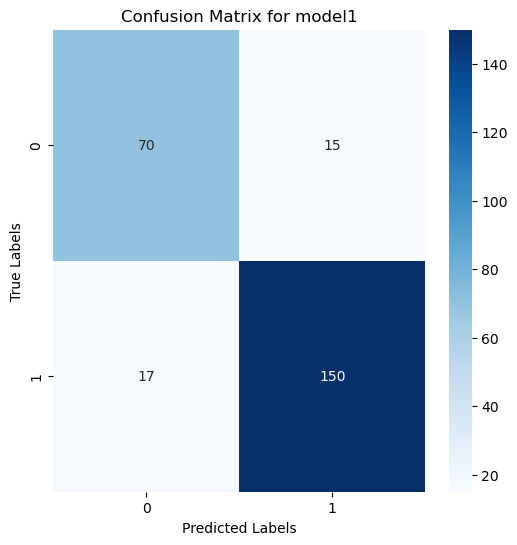

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have trained the model and obtained y_pred and y_test
# y_pred: Predicted labels from your model
# y_test: True labels from your test data

# Create confusion matrix
cm1 = confusion_matrix(ytest,ypred_cond1)


# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for model1")
plt.show()


In [55]:
# Calculate evaluation metrics for each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_model1 = accuracy_score(ytest, ypred_cond1)
precision_model1 = precision_score(ytest, ypred_cond1)
recall_model1 = recall_score(ytest, ypred_cond1)
f1_model1 = f1_score(ytest, ypred_cond1)

accuracy_model2 = accuracy_score(ytest, ypred_cond2)
precision_model2 = precision_score(ytest, ypred_cond2)
recall_model2 = recall_score(ytest, ypred_cond2)
f1_model2 = f1_score(ytest, ypred_cond2)

accuracy_model3 = accuracy_score(ytest, ypred_cond3)
precision_model3 = precision_score(ytest, ypred_cond3)
recall_model3 = recall_score(ytest, ypred_cond3)
f1_model3 = f1_score(ytest, ypred_cond3)

accuracy_model4 = accuracy_score(ytest, ypred_cond4)
precision_model4 = precision_score(ytest, ypred_cond4)
recall_model4 = recall_score(ytest, ypred_cond4)
f1_model4 = f1_score(ytest, ypred_cond4)

accuracy_model5 = accuracy_score(ytest, ypred_cond5)
precision_model5 = precision_score(ytest, ypred_cond5)
recall_model5 = recall_score(ytest, ypred_cond5)
f1_model5 = f1_score(ytest, ypred_cond5)

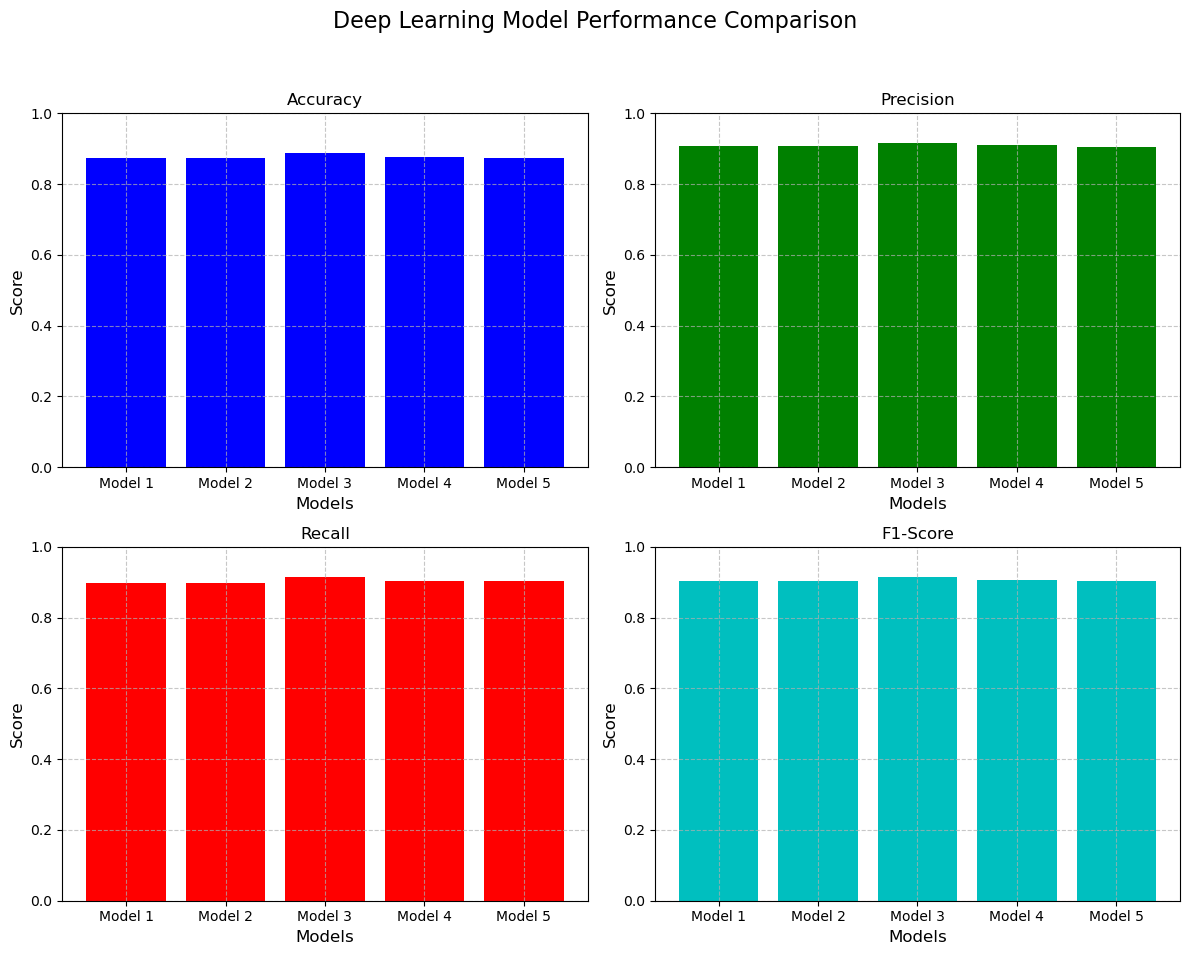

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

# Define evaluation metric values (replace with your actual values)
accuracy_values = [accuracy_model1, accuracy_model2, accuracy_model3, accuracy_model4, accuracy_model5]
precision_values = [precision_model1, precision_model2, precision_model3, precision_model4, precision_model5]
recall_values = [recall_model1, recall_model2, recall_model3, recall_model4, recall_model5]
f1_values = [f1_model1, f1_model2, f1_model3, f1_model4, f1_model5]

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Deep Learning Model Performance Comparison', fontsize=16)

# Accuracy subplot
axes[0, 0].bar(model_names, accuracy_values, color='b')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Precision subplot
axes[0, 1].bar(model_names, precision_values, color='g')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Recall subplot
axes[1, 0].bar(model_names, recall_values, color='r')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# F1-score subplot
axes[1, 1].bar(model_names, f1_values, color='c')
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Add axis scaling labels
for ax in axes.flat:
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


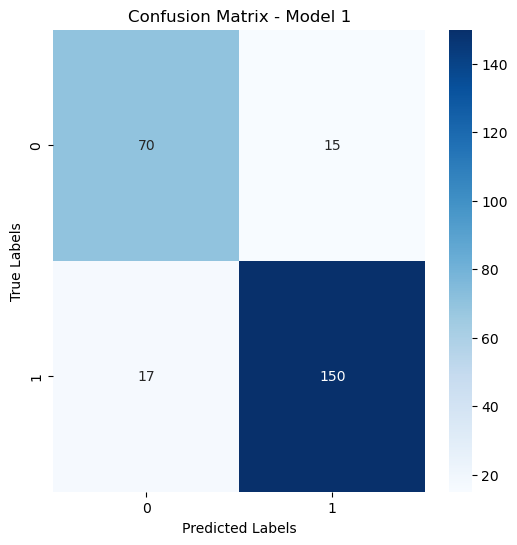

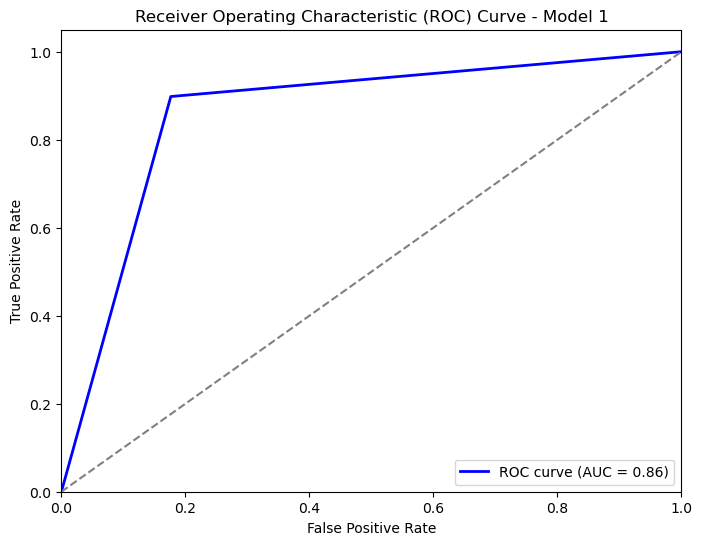

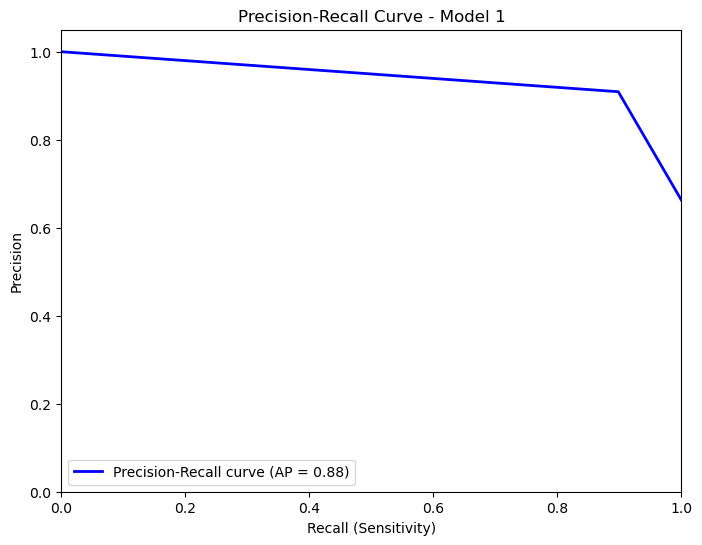

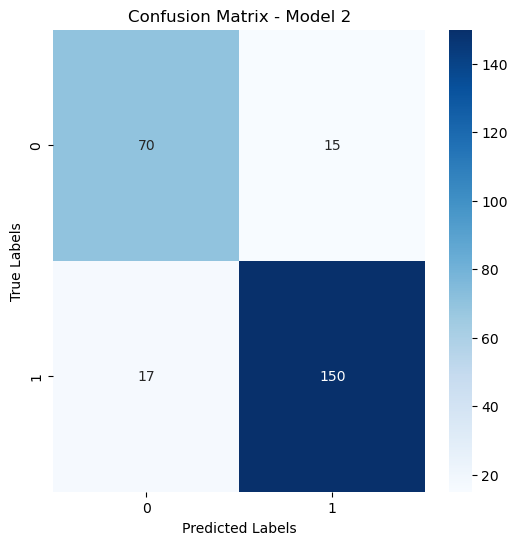

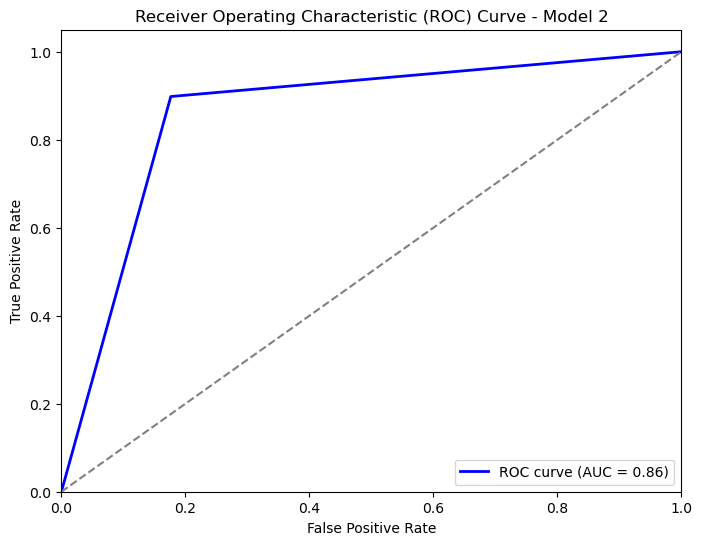

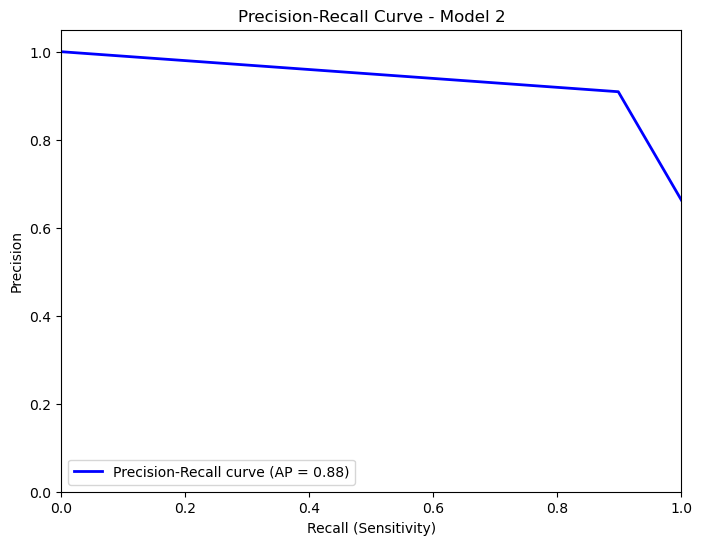

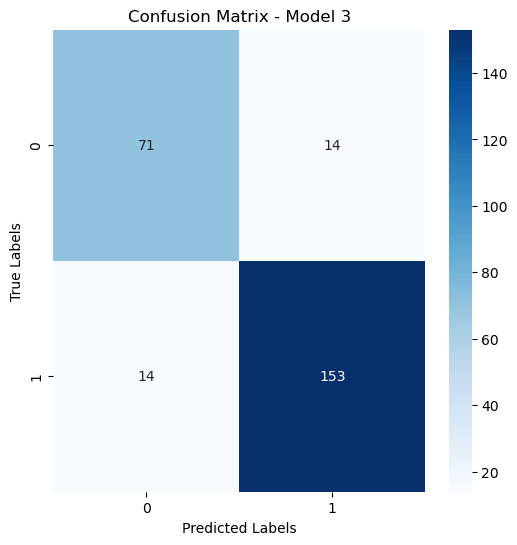

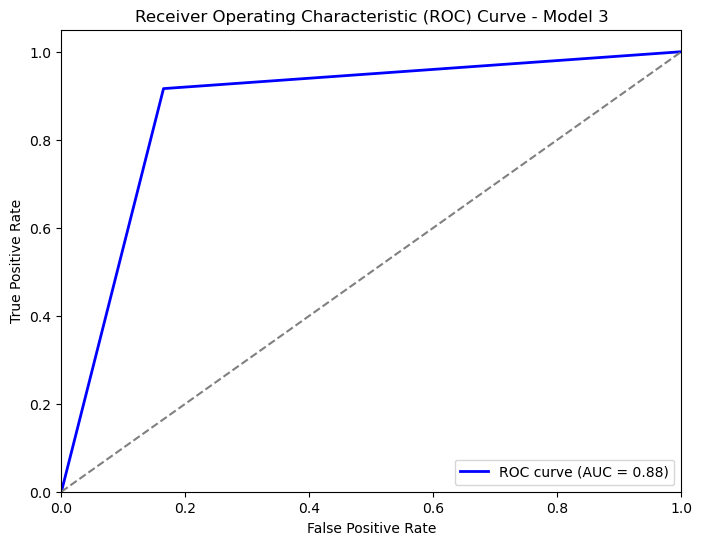

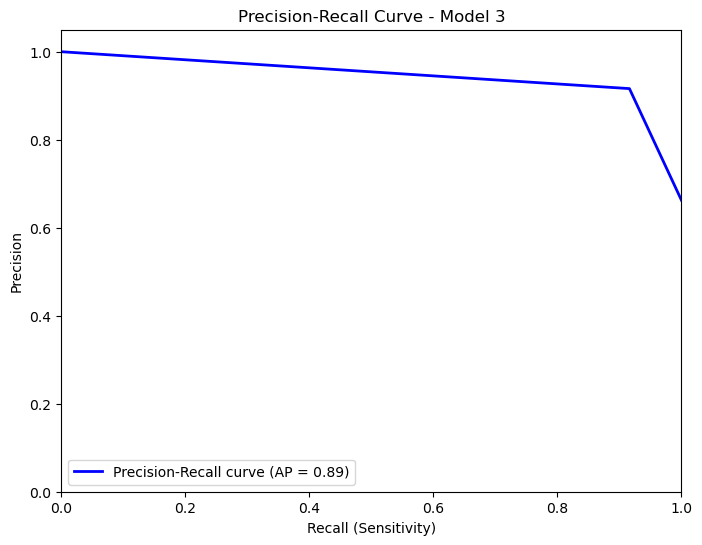

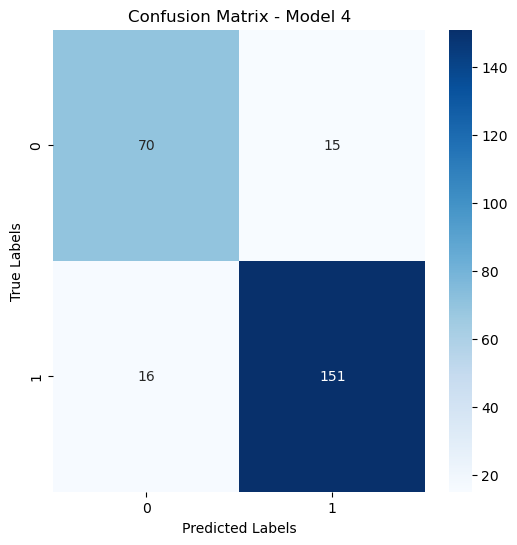

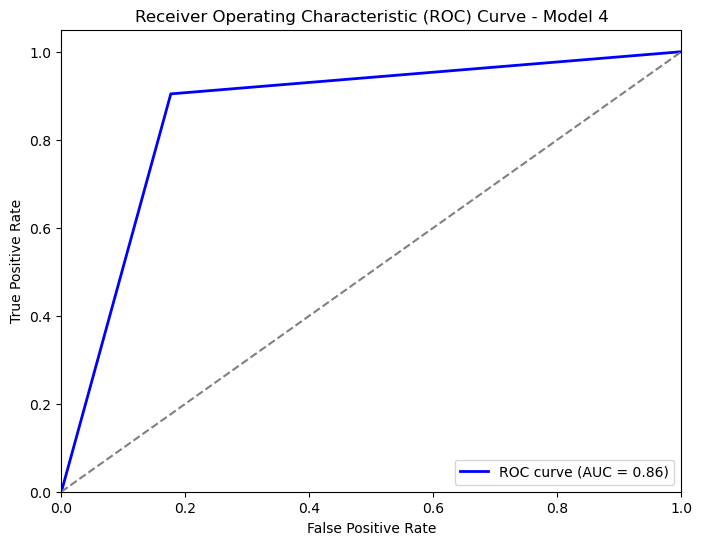

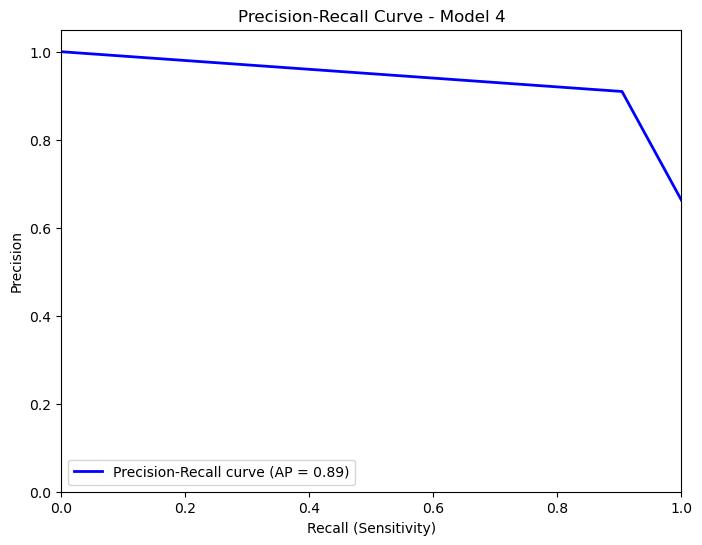

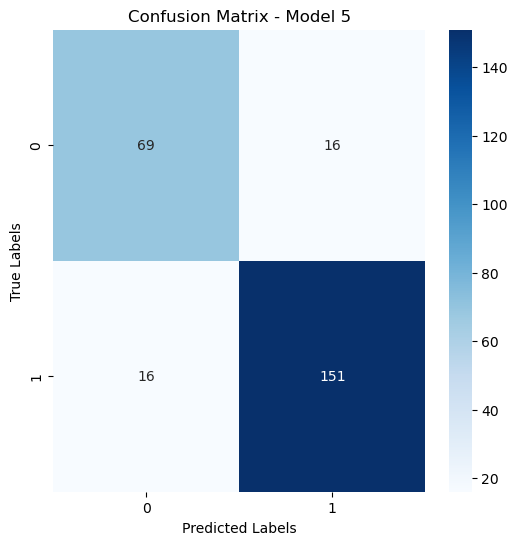

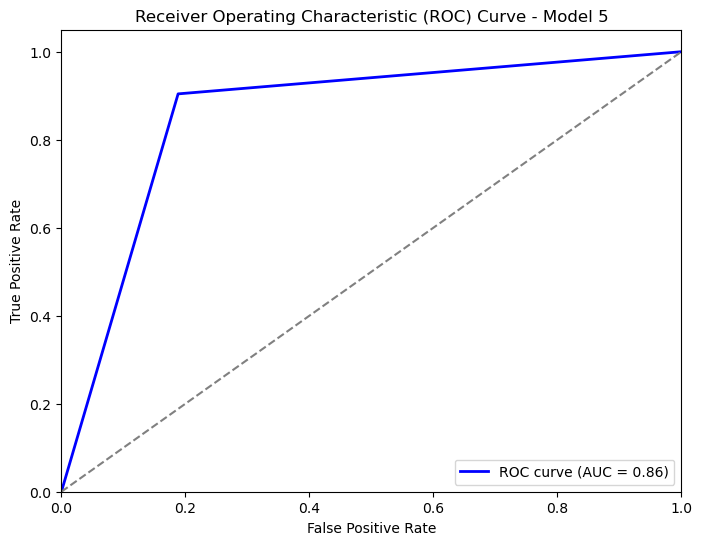

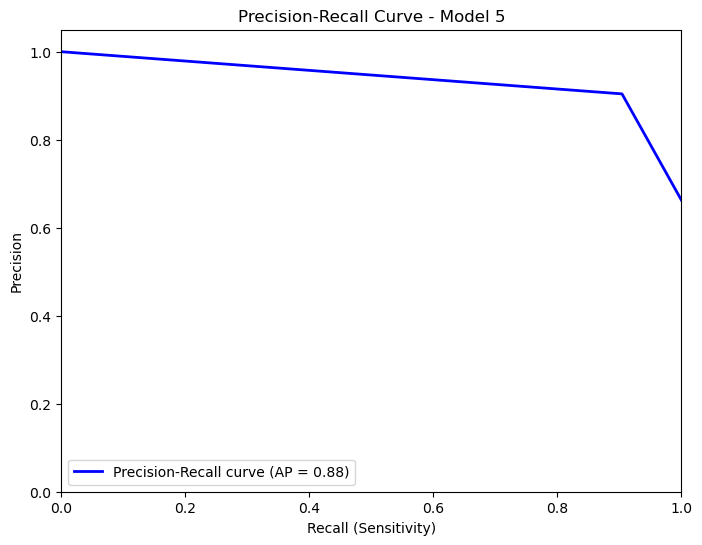

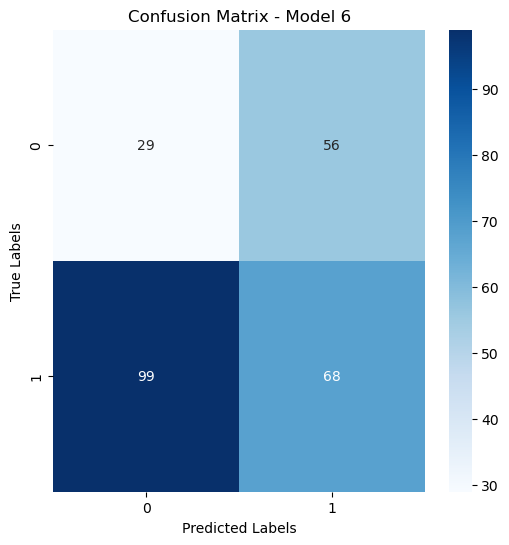

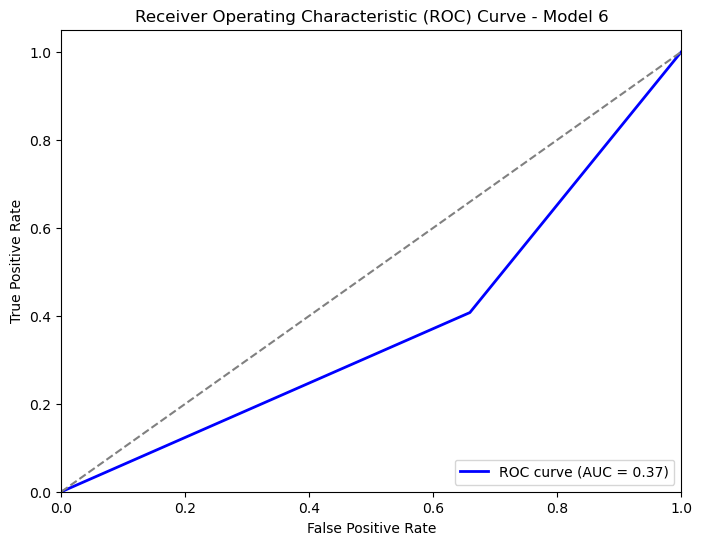

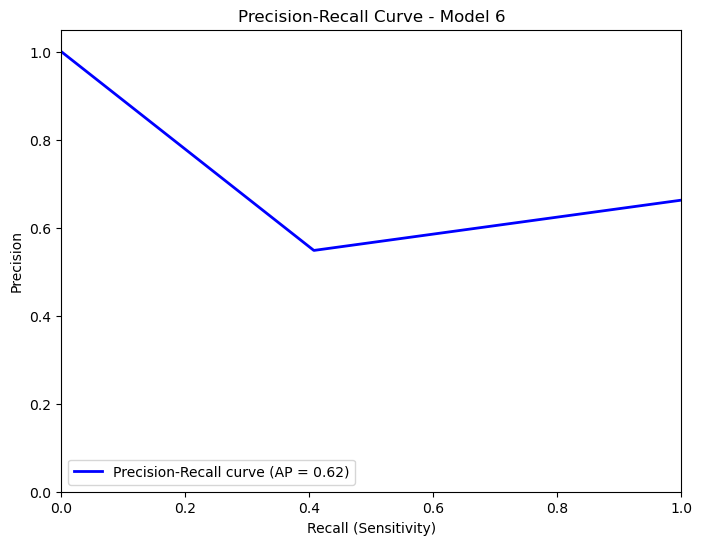

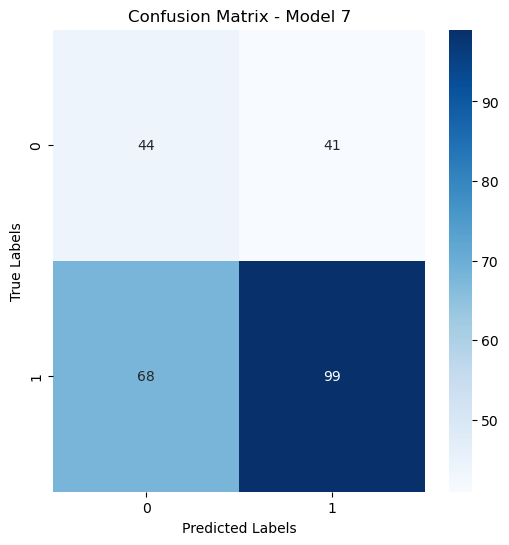

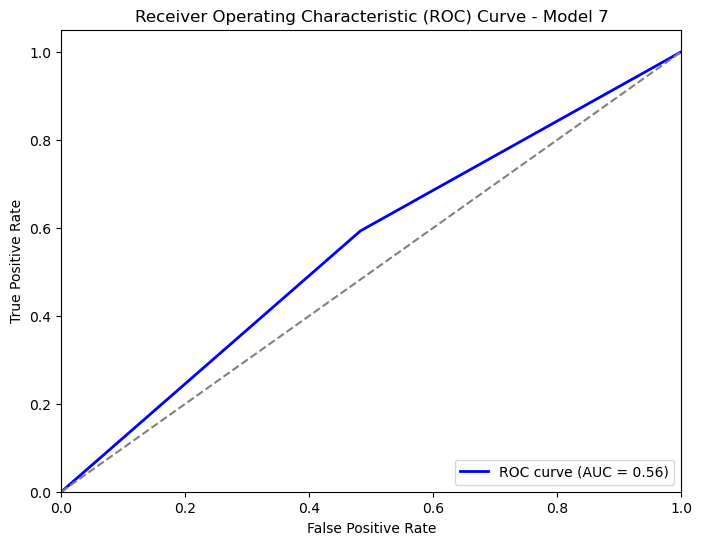

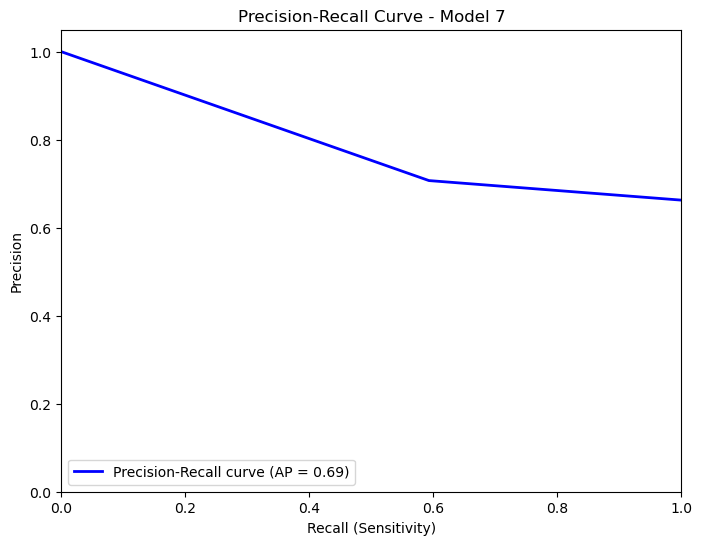

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

def plot_evaluation_results(y_test, y_pred_probs, model_name):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_probs >= 0.5)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = roc_auc_score(y_test, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
    avg_precision = average_precision_score(y_test, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(avg_precision))
    plt.xlabel('Recall (Sensitivity)')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='lower left')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

# Assuming you have ytest and ypred data for each model
# model1: ytest, ypred_cond1
# model2: ytest, ypred_cond2
# model3: ytest, ypred_cond3
# model4: ytest, ypred_cond4
# model5: ytest, ypred_cond5

# Example usage:
# For model1
plot_evaluation_results(ytest, ypred_cond1, "Model 1")

# For model2
plot_evaluation_results(ytest, ypred_cond2, "Model 2")

# For model3
plot_evaluation_results(ytest, ypred_cond3, "Model 3")

# For model4
plot_evaluation_results(ytest, ypred_cond4, "Model 4")

# For model5
plot_evaluation_results(ytest, ypred_cond5, "Model 5")
plot_evaluation_results(ytest, ypred_cond6, "Model 6")
plot_evaluation_results(ytest, ypred_cond7, "Model 7")
# plot_evaluation_results(ytest, ypred_cond8, "Model 8")


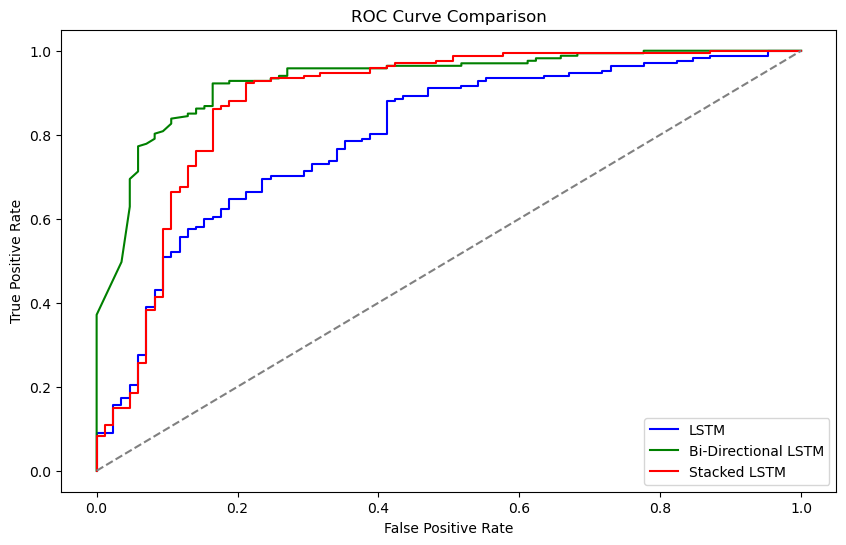

In [88]:
#ROC curve

fpr1, tpr1, _ = roc_curve(ytest, ypred1)
fpr2, tpr2, _ = roc_curve(ytest, ypred2)
fpr3, tpr3, _ = roc_curve(ytest, ypred3)

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='blue', label='LSTM')
plt.plot(fpr2, tpr2, color='green', label='Bi-Directional LSTM')
plt.plot(fpr3, tpr3, color='red', label='Stacked LSTM')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

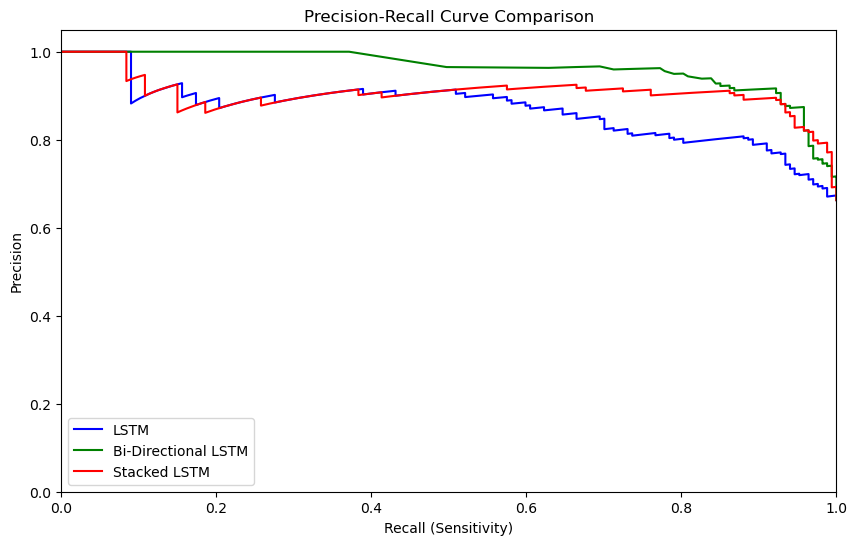

In [89]:
#precision recall curve
from sklearn.metrics import precision_recall_curve

precision1, recall1, _ = precision_recall_curve(ytest, ypred1)
precision2, recall2, _ = precision_recall_curve(ytest, ypred2)
precision3, recall3, _ = precision_recall_curve(ytest, ypred3)

plt.figure(figsize=(10, 6))
plt.plot(recall1, precision1, color='blue', label='LSTM')
plt.plot(recall2, precision2, color='green', label='Bi-Directional LSTM')
plt.plot(recall3, precision3, color='red', label='Stacked LSTM')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

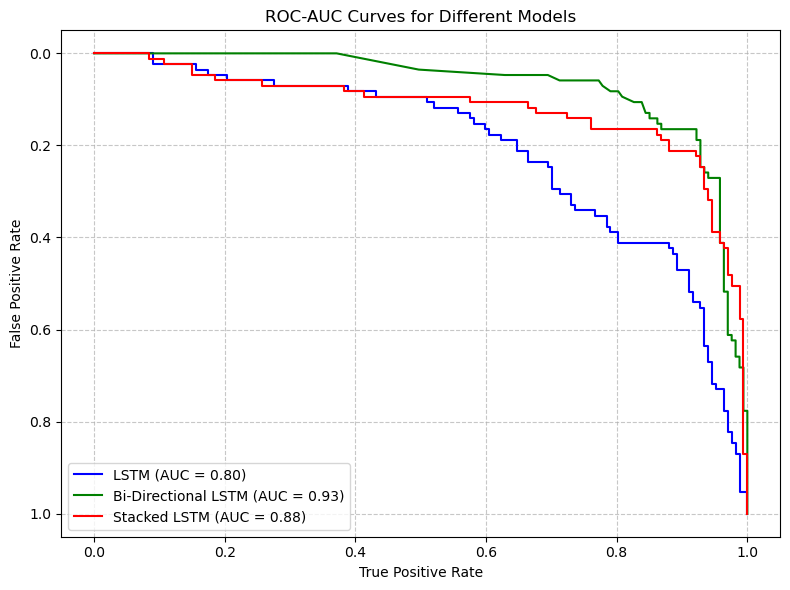

In [90]:
#ROC-AUC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have ytest (true labels) and ypred1, ypred2, ypred3 (predicted probabilities for different models)
fpr1, tpr1, _ = roc_curve(ytest, ypred1)
fpr2, tpr2, _ = roc_curve(ytest, ypred2)
fpr3, tpr3, _ = roc_curve(ytest, ypred3)

# Calculate AUC scores for different models
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC-AUC curves for different models
plt.figure(figsize=(8, 6))
plt.plot(tpr1, fpr1, color='blue', label=f'LSTM (AUC = {roc_auc1:.2f})')
plt.plot(tpr2, fpr2, color='green', label=f'Bi-Directional LSTM (AUC = {roc_auc2:.2f})')
plt.plot(tpr3, fpr3, color='red', label=f'Stacked LSTM (AUC = {roc_auc3:.2f})')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC-AUC Curves for Different Models')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Reverse the x-axis
plt.tight_layout()
plt.show()


## dumping models using joblib

In [61]:
import joblib

In [62]:
filename = 'simpleLSTM.sav'
joblib.dump(model1, filename)

['simpleLSTM.sav']

In [63]:
filename = 'bidirectional.sav'
joblib.dump(model2, filename)

['bidirectional.sav']

In [64]:
filename = 'stackLSTM.sav'
joblib.dump(model3, filename)

['stackLSTM.sav']

In [65]:
filename = 'dropoutLSTM.sav'
joblib.dump(model4, filename)

['dropoutLSTM.sav']

In [66]:
filename = 'convLSTM.sav'
joblib.dump(model5, filename)

['convLSTM.sav']

## converting the python model into ONNX model

In [67]:
# from skl2onnx import convert_sklearn
# from skl2onnx.common.data_types import FloatTensorType

# # Load the model from .sav file using joblib
# modelsimple = joblib.load('simpleLSTM.sav')

# Define the input and output types for the ONNX model
# input_type = [('input', FloatTensorType([None, 30]))]
# output_type = [('output', FloatTensorType([None, 1]))]

# Convert the model to ONNX format
# onnx_model = convert_sklearn(model1, initial_types=input_type, target_opset=12)

# Save the ONNX model to a file
# with open('model1.onnx', 'wb') as f:
#     f.write(onnx_model.SerializeToString())

ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

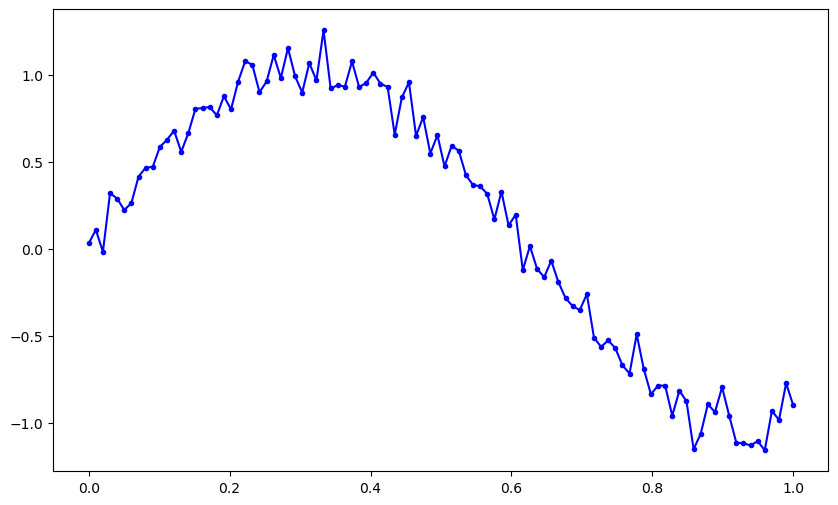

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
num_samples = 100
xtest_sample = np.linspace(0, 1, num_samples)  # Generate xtest data
ypred1_sample = np.sin(xtest_sample * 5) + np.random.normal(0, 0.1, num_samples)  # Example predicted data

# Create a new figure and set the size
plt.figure(figsize=(10, 6))

# Plot the actual vs. predicted values using a line graph
plt.plot(xtest_sample, ypred1_sample, marker='.', linestyle='-', color='b', label='Predicted')
plt.plot(xtest_sample, ytest[:10], marker='.', linestyle='-', color='r', label='Actual')

# Set labels and title
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('DL Model Predictions vs. Actual')
plt.legend()  # Show legend to distinguish between predicted and actual

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize ticks on x-axis
plt.xticks(xtest_sample)
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


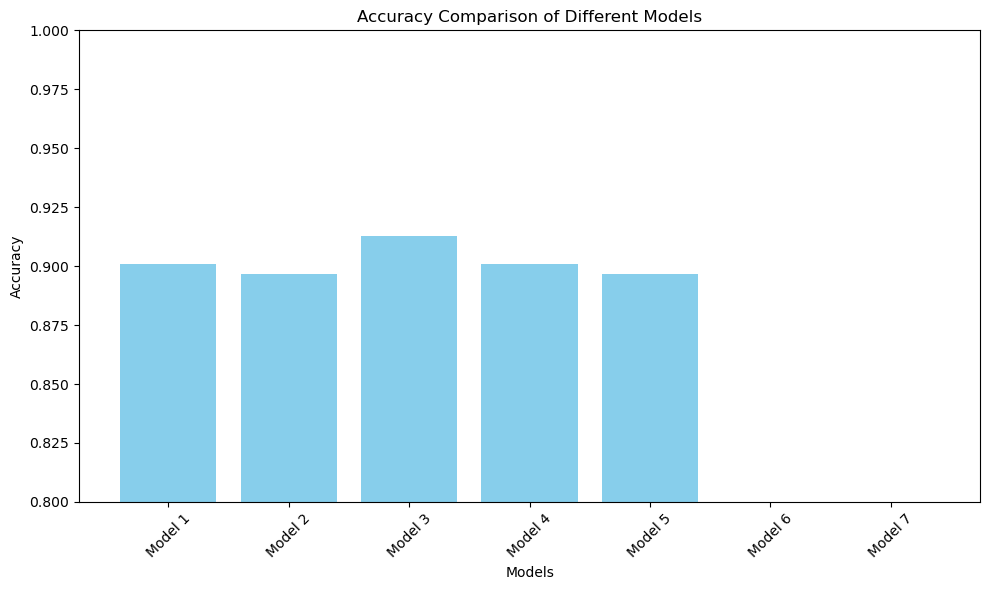

In [ ]:
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']
accuracies = [accuracy_score(ytest, ypred_cond1),
              accuracy_score(ytest, ypred_cond2),
              accuracy_score(ytest, ypred_cond3),
              accuracy_score(ytest, ypred_cond4),
              accuracy_score(ytest, ypred_cond5),
              accuracy_score(ytest, ypred_cond6),
              accuracy_score(ytest, ypred_cond7)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

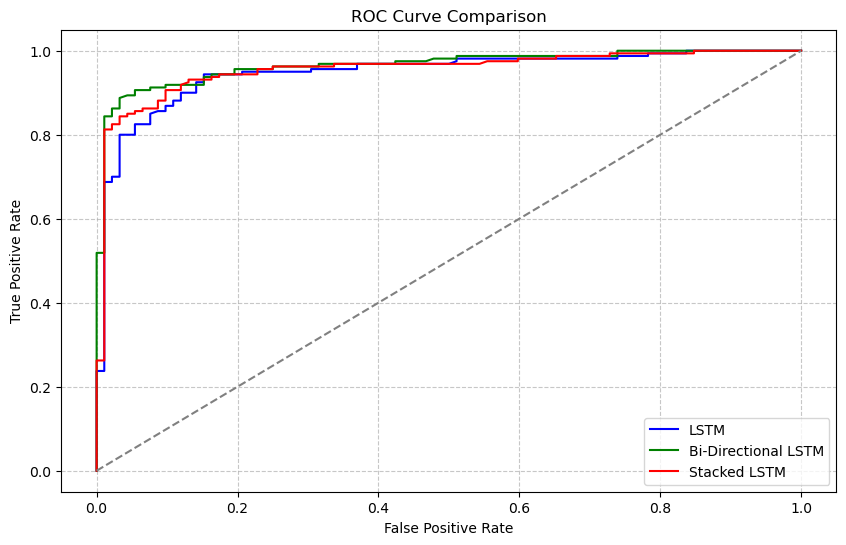

In [ ]:
fpr1, tpr1, _ = roc_curve(ytest, ypred1)
fpr2, tpr2, _ = roc_curve(ytest, ypred2)
fpr3, tpr3, _ = roc_curve(ytest, ypred3)

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='blue', label='LSTM')
plt.plot(fpr2, tpr2, color='green', label='Bi-Directional LSTM')
plt.plot(fpr3, tpr3, color='red', label='Stacked LSTM')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

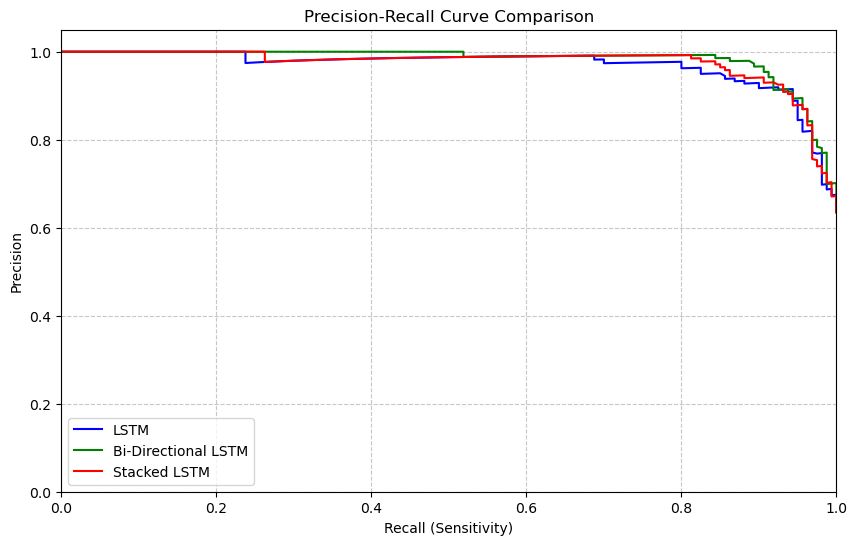

In [ ]:
from sklearn.metrics import precision_recall_curve

precision1, recall1, _ = precision_recall_curve(ytest, ypred1)
precision2, recall2, _ = precision_recall_curve(ytest, ypred2)
precision3, recall3, _ = precision_recall_curve(ytest, ypred3)

plt.figure(figsize=(10, 6))
plt.plot(recall1, precision1, color='blue', label='LSTM')
plt.plot(recall2, precision2, color='green', label='Bi-Directional LSTM')
plt.plot(recall3, precision3, color='red', label='Stacked LSTM')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

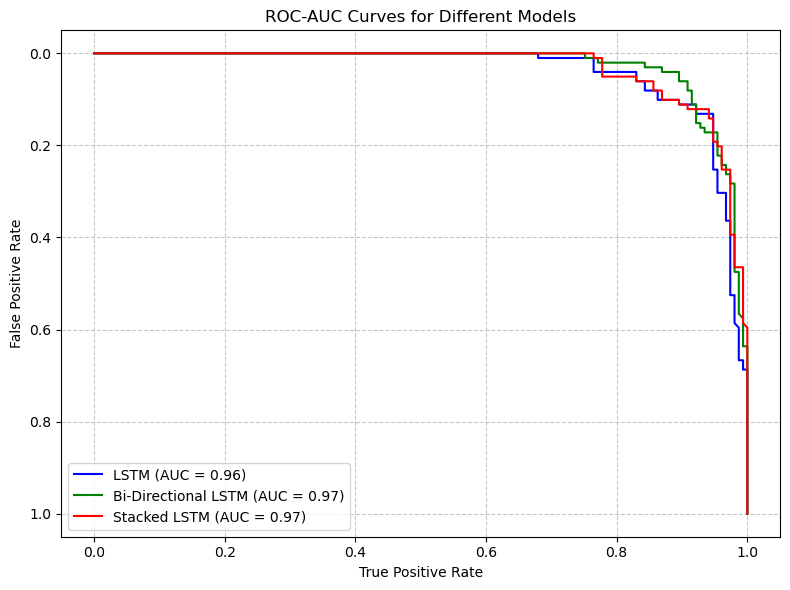

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have ytest (true labels) and ypred1, ypred2, ypred3 (predicted probabilities for different models)
fpr1, tpr1, _ = roc_curve(ytest, ypred1)
fpr2, tpr2, _ = roc_curve(ytest, ypred2)
fpr3, tpr3, _ = roc_curve(ytest, ypred3)

# Calculate AUC scores for different models
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC-AUC curves for different models
plt.figure(figsize=(8, 6))
plt.plot(tpr1, fpr1, color='blue', label=f'LSTM (AUC = {roc_auc1:.2f})')
plt.plot(tpr2, fpr2, color='green', label=f'Bi-Directional LSTM (AUC = {roc_auc2:.2f})')
plt.plot(tpr3, fpr3, color='red', label=f'Stacked LSTM (AUC = {roc_auc3:.2f})')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC-AUC Curves for Different Models')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Reverse the x-axis
plt.tight_layout()
plt.show()
